#**DenseNet201**

###📥 **Import Libraries**

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

# common library
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# tensor computation
from tensorflow.random import set_seed
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import plot_model
from keras.models import Model, load_model
from keras.applications import DenseNet201

Mounted at /content/drive


###🔒 **Inisialisasi Bilangan Random**

In [ ]:
def set_random(seed):
  np.random.seed(seed)
  set_seed(seed)

set_random(2022)

###🪆 **Data Augmentation**

In [ ]:
# file directory
file_dir = '/content/drive/Shareddrives/Teman Tapi Mining/Satria Data/2022/'
data_dir = 'data/Garbage classification/Garbage classification/'
dir = file_dir + data_dir

# train generator
train = ImageDataGenerator(
    horizontal_flip = True, vertical_flip = True,
    validation_split = 0.1, rescale = 1./255,
    shear_range = 0.1, zoom_range = 0.1,
    width_shift_range = 0.1, height_shift_range = 0.1
    )
train_generator = train.flow_from_directory(
    dir, target_size = (512, 384), batch_size = 32,
    class_mode = 'categorical', subset = 'training'
    )

# test generator
test = ImageDataGenerator(rescale = 1./255, validation_split = 0.1)
test_generator = test.flow_from_directory(
    dir, target_size = (512, 384), batch_size = 32,
    class_mode = 'categorical', subset = 'validation'
    )

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.


###🎯 **Modeling**

In [ ]:
pretrained = DenseNet201(input_shape = (512, 384, 3), include_top = False, weights = 'imagenet')
pretrained.trainable = False
layers = Flatten()(pretrained.output)
layers = Dense(64, activation = 'relu')(layers)
outputs = Dense(6, activation = 'softmax')(layers)
model = Model(inputs = [pretrained.input], outputs = [outputs])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

74836368/74836368 [==============================] - 2s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 384, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 518, 390, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 256, 192, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                             

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.417223 to fit



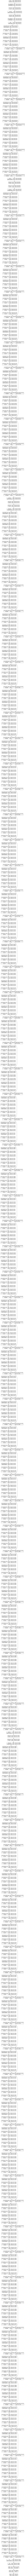

In [ ]:
plot_model(model, show_shapes = True)

In [ ]:
# define parameters
batch_size = 32
num_epochs = 100

# train & test steps
step_size_train = train_generator.n//train_generator.batch_size
step_size_test = test_generator.n//test_generator.batch_size

In [ ]:
history = model.fit(
    train_generator, epochs = num_epochs, steps_per_epoch = step_size_train,
    validation_data = test_generator, validation_steps = step_size_test
    )

Epoch 1/100
71/71 [==============================] - 1574s 22s/step - loss: 3.8757 - accuracy: 0.4118 - val_loss: 1.3829 - val_accuracy: 0.4643
Epoch 2/100
71/71 [==============================] - 102s 1s/step - loss: 1.2569 - accuracy: 0.5143 - val_loss: 1.1400 - val_accuracy: 0.5670
Epoch 3/100
71/71 [==============================] - 103s 1s/step - loss: 1.0075 - accuracy: 0.5406 - val_loss: 0.8796 - val_accuracy: 0.5625
Epoch 4/100
71/71 [==============================] - 103s 1s/step - loss: 0.9009 - accuracy: 0.5660 - val_loss: 1.1079 - val_accuracy: 0.5804
Epoch 5/100
71/71 [==============================] - 102s 1s/step - loss: 0.8886 - accuracy: 0.5798 - val_loss: 0.9121 - val_accuracy: 0.6339
Epoch 6/100
71/71 [==============================] - 102s 1s/step - loss: 0.8121 - accuracy: 0.6257 - val_loss: 0.8204 - val_accuracy: 0.6071
Epoch 7/100
71/71 [==============================] - 101s 1s/step - loss: 0.8221 - accuracy: 0.6248 - val_loss: 0.8251 - val_accuracy: 0.6875
Epoc

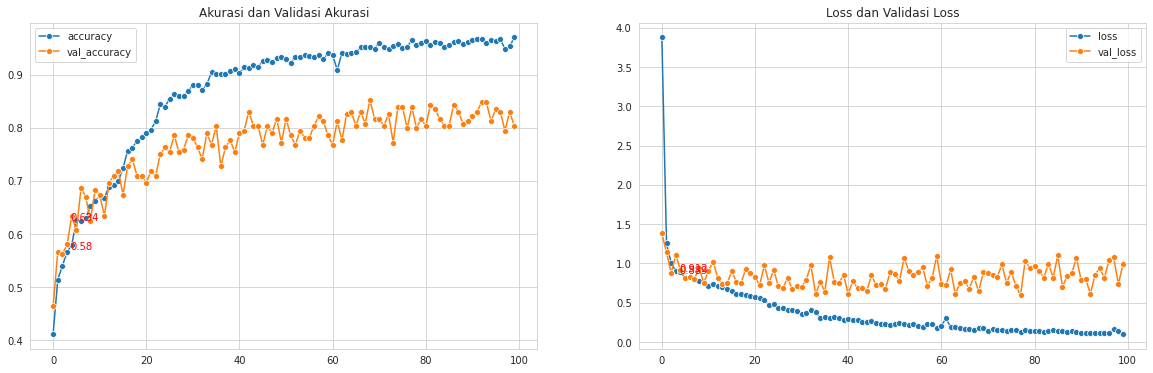

In [ ]:
sns.set_style(style = 'whitegrid')

fig, axes = plt.subplots(1, 2, figsize=(20, 6))
graph = ['accuracy', 'loss']
title = ["Akurasi dan Validasi Akurasi", "Loss dan Validasi Loss"]

def draw_graph(i, text, title):
  axes[i].set_title(title)
  fig = sns.lineplot(ax = axes[i], x = history.epoch, y = history.history[text], marker = 'o')
  fig = sns.lineplot(ax = axes[i], x = history.epoch, y = history.history[f'val_{text}'], marker = 'o')
  axes[i].legend([text, f'val_{text}'])

def text_graph(i, text):
  for j, (x, y) in enumerate(zip(history.epoch, history.history[f'{text}'])):
    if j == 4:
      axes[i].text(x = x - 0.2, y = y - 0.009, s = round(y, 3), color = 'red') 
  for j, (x, y) in enumerate(zip(history.epoch, history.history[f'val_{text}'])):
    if j == 4:
      axes[i].text(x = x - 0.2, y = y - 0.009, s = round(y, 3), color = 'red') 

for i, (val, tit) in enumerate(zip(graph, title)):
    draw_graph(i, val, tit)
    text_graph(i, val)

In [ ]:
# save & load model
model.save(file_dir + 'model/DenseNet201.h5')
model = load_model(file_dir + 'model/DenseNet201.h5')

In [ ]:
# train evaluation
train_eval = model.evaluate(train_generator)
for name, value in zip(model.metrics_names, train_eval):
  print(name, ':', round(value, 5))
print()

72/72 [==============================] - 1991s 28s/step - loss: 0.1141 - accuracy: 0.9627
loss : 0.11411
accuracy : 0.96265



In [ ]:
# test evaluation
test_eval = model.evaluate(test_generator)
for name, value in zip(model.metrics_names, test_eval):
  print(name, ':', round(value, 5))
print()

8/8 [==============================] - 213s 27s/step - loss: 0.9153 - accuracy: 0.8167
loss : 0.91528
accuracy : 0.81673

